In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import os 
ROOT = "D:/Courses/Ineuron/DeepLearningANN_Sachin/Deep_Learning_Notes/CNN"
os.chdir(ROOT)

In [3]:
pwd

'D:\\Courses\\Ineuron\\DeepLearningANN_Sachin\\Deep_Learning_Notes\\CNN'

In [4]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is A62E-BC19

 Directory of D:\Courses\Ineuron\DeepLearningANN_Sachin\Deep_Learning_Notes\CNN

24-07-2022  19:28    <DIR>          .
24-07-2022  19:28    <DIR>          ..
16-07-2022  20:18    <DIR>          .ipynb_checkpoints
23-06-2022  19:26            13,586 car_grayscale.jpeg
22-06-2022  16:14             7,647 car1.jpeg
22-06-2022  16:14        13,343,790 Day-13_DL_FSDS.pdf
24-06-2022  20:11        12,985,063 Day-14_DL_FSDS.pdf
24-07-2022  10:57    <DIR>          FashionMNISTDir
24-07-2022  10:16           911,676 Image understanding.ipynb
24-06-2022  22:03         1,416,328 POC for CNN and pooling.ipynb
24-07-2022  19:28           111,252 Pytorch_CNN.ipynb
               7 File(s)     28,789,342 bytes
               4 Dir(s)  666,541,342,720 bytes free


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [7]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR = "FashionMNISTDir"
        self.EPOCH = 10
        self.BATCH_SIZE = 32
        self.LEARNING_RATE = 0.01
        self.IMAGE_SIZE = (28, 28)
        self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"this notebook is using device: {self.DEVICE}")
        self.SEED = 2022

config = Config()

this notebook is using device: cpu


In [8]:
train_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [9]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [10]:
test_data.data.shape


torch.Size([10000, 28, 28])

In [11]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
# this dist is form value : key. We need to covert it to key:value
given_label_map = train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
# convert the above dict to key:value format
label_map = {val: key for key, val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Visualize one of the samples

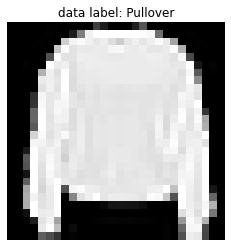

In [15]:
def view_sample_img(data, idx, label_map):
    plt.imshow(data.data[idx], cmap="gray") # grayscale
    plt.title(f"data label: {label_map[data.targets[idx].item()]}")
    plt.axis("off")

view_sample_img(train_data, 7, label_map)

## Create the dataloader

In [16]:
# dataloader creates a iterator

train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = config.BATCH_SIZE,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = config.BATCH_SIZE,
    shuffle = False
)

In [17]:
# iterate over train loader
for images, labels in train_data_loader:
    print(f"image sahape : {images.shape}")
    print(f"label shape : {labels.shape}")
    break

image sahape : torch.Size([32, 1, 28, 28])
label shape : torch.Size([32])


**Observation:**
+ Size = 28 * 28

+ channel = 1

+ batch size = 32

In [18]:
images[0].shape

torch.Size([1, 28, 28])

In [19]:
# removes 1 in torch.Size([1, 28, 28])
images[0].squeeze().shape

torch.Size([28, 28])

In [20]:
# covert tensor to numpy
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

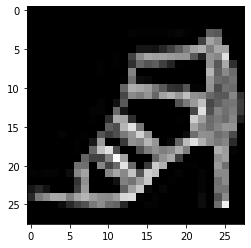

In [21]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [22]:
# before and after squeeze

images[0].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [23]:
images[0][0].shape

torch.Size([28, 28])

In [24]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0078, 0.0078, 0.0078, 0.0078,
         0.0157, 0.0275, 0.0078, 0.0000, 0.0000, 0.3725

In [25]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0078, 0.0078,
           0.0078, 0.0078, 0.0157, 0.0275, 

In [26]:
# parent class: nn.Module

class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()

        self.conv_pool_01 = nn.Sequential(
            nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_pool_02 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.Flatten = nn.Flatten()
        self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
        self.FC_02 = nn.Linear(in_features=128, out_features=64)
        self.FC_03 = nn.Linear(in_features=64, out_features=out_)

    def forward(self, x):
        x = self.conv_pool_01(x)
        x = self.conv_pool_02(x)
        x = self.Flatten(x)
        x = self.FC_01(x)
        x = F.relu(x)
        x = self.FC_02(x)
        x = F.relu(x)    
        x = self.FC_03(x)
        return x

In [27]:
# 1 --> input channel; 10 --> output
model = CNN(1, 10)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [28]:
# we can access any layer in cnn model
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [29]:
next(model.parameters()).is_cuda

False

In [30]:
# to use GPU
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [31]:
# verify whether it's using GPU
next(model.parameters()).is_cuda

False

## Count the no. of trainable parameters

In [32]:
def count_params(model):
    
    model_params = {"Modules": list(), "Parameters": list()}
    total = {"trainable": 0, "non_trainable": 0}
    
    for name, parameters in model.named_parameters():
        param = parameters.numel()
        # if parameters don't require gradient then skip
        if not parameters.requires_grad:
            total["non_trainable"] += param
            continue
            
        model_params["Modules"].append(name)
        model_params["Parameters"].append(param)
        total["trainable"] += param
        
    df = pd.DataFrame(model_params)
    df = df.style.set_caption(f"Total parameters: {total}")
    return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training loop

In [33]:
# (training sample)/ (batch size)
60000/32

1875.0

1875.0 steps to be taken ine ach epoch

In [34]:
# define the loss funtion and optimizer
criterion = nn.CrossEntropyLoss() ## loss function
optimizer = torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE) # passing all model parameters to optimizer

In [35]:
len(train_data_loader) ## STEPS PER EPOCHS

1875

In [36]:
# tqdm: used to progress bars

for epoch in range(config.EPOCH):
    
    with tqdm(train_data_loader) as tqdm_epoch:
        
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch {epoch + 1}/{config.EPOCH}")

            # put the images on device (GPU)
            images = images.to(config.DEVICE)
            labels = labels.to(config.DEVICE)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels) # TODO #<< passing the pred, target

            # backward prop
            optimizer.zero_grad() # past gradient
            loss.backward() # calculate the gradients
            optimizer.step() # weights updated
            
            tqdm_epoch.set_postfix(loss=loss.item()) # printing the loss

Epoch 10/10: 100%|█████████████████████████████████████████████████████| 1875/1875 [00:26<00:00, 71.70it/s, loss=0.238]


## Save the model

In [ ]:
os.makedirs("model_dir", exist_ok=True)
model_file_path = os.path.join("model_dir", "CNN_model.pth")
torch.save(model, model_file_path)

## Load the model

In [ ]:
loaded_model = torch.load(model_file_path)

## Evaluate our model

In [37]:
pred = np.array([])
target = np.array([])

# no back prop, since we are just evaluating model
with torch.no_grad():
    
    for batch, data in enumerate(test_data_loader):
        images = data[0].to(config.DEVICE)
        labels = data[1].to(config.DEVICE)

        y_pred = model(images)

        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, labels.cpu().numpy()))

In [38]:
cm = confusion_matrix(target, pred)

In [39]:
1e3

1000.0

In [40]:
label_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

<AxesSubplot:>

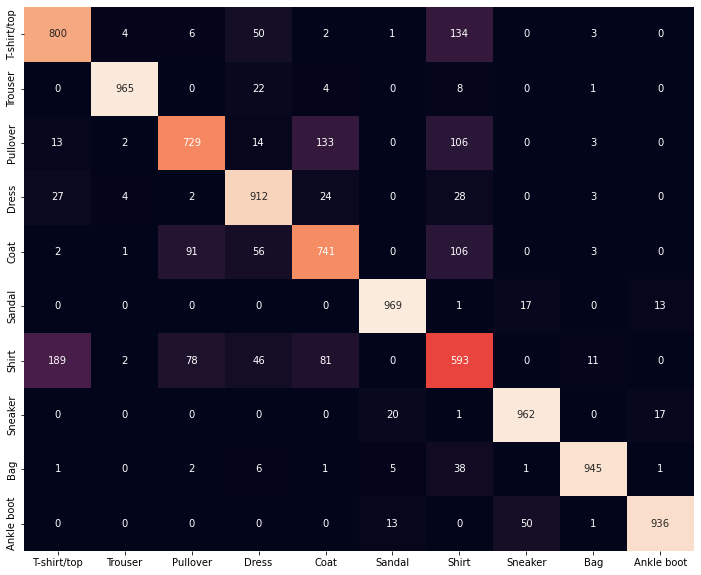

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values() , yticklabels=label_map.values(), cbar=False)

## prediction on our model

In [42]:
data = next(iter(test_data_loader))
data

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [43]:
len(data)

2

In [44]:
images, labels = data

In [45]:
images.shape

torch.Size([32, 1, 28, 28])

In [46]:
# taking one of the image with index 2
idx = 2
img = images[idx]
img.shape

torch.Size([1, 28, 28])

In [47]:
label = labels[idx]
label_map[label.item()]

'Trouser'

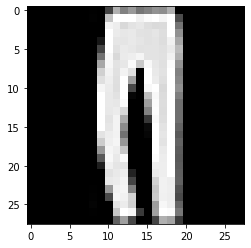

In [48]:
plt.imshow(img.squeeze(), cmap="gray")

In [49]:
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [50]:
logit = model(img.unsqueeze(dim=1).to(config.DEVICE))
logit

tensor([[-220.3254,  -11.4445, -109.3100, -171.4081, -108.4545, -244.0211,
         -172.0920, -275.7307, -229.3592, -363.1414]],
       grad_fn=<AddmmBackward0>)

In [51]:
sum([   1.9107,   32.9941,  -36.2391,  -12.3562,  -45.1147, -144.5987,
           -9.1314,  -82.8379,  -24.2255, -118.4811])

-438.0798

In [52]:
pred_prob = F.softmax(logit, dim=1)
pred_prob

tensor([[0.0000e+00, 1.0000e+00, 3.1389e-43, 0.0000e+00, 7.3989e-43, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SoftmaxBackward0>)

In [53]:
sum([3.1670e-14, 1.0000e+00, 8.5586e-31, 2.0167e-20, 1.1961e-34, 0.0000e+00,
         5.0714e-19, 0.0000e+00, 1.4121e-25, 0.0000e+00])

1.0000000000000318

In [54]:
argmax = torch.argmax(pred_prob).item()
argmax 

1

In [55]:
label_map[argmax]

'Trouser'

In [56]:
def predict(data, model, label_map, device, idx=0):
    
    images, labels = data
    img = images[idx]
    label = labels[idx]

    plt.imshow(img.squeeze(), cmap="gray")
    logit = model(img.unsqueeze(dim=1).to(config.DEVICE))
    pred_prob = F.softmax(logit, dim=1)
    argmax = torch.argmax(pred_prob).item()

    predicted_label = label_map[argmax]
    actual_label = label_map[label.item()]

    plt.title(f"actual: {actual_label} | predicted: {predicted_label}")
    plt.axis("off")
    return predicted_label, actual_label


('Trouser', 'Trouser')

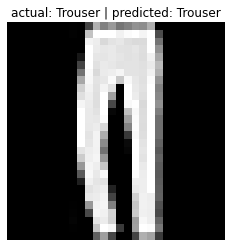

In [57]:
predict(data, model, label_map, config.DEVICE, idx=2)